# Advertisement Click Prediction

In [1]:
# Imorts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Get rid of scientific notation (e) while displaying numbers in a data frame
pd.options.display.float_format = '{:.8f}'.format

# Set plot style
sns.set_style('whitegrid')

## Reading Data

In [2]:
# Read in the advertising.csv file and set it to a data frame called ad_data.
ad_data = pd.read_csv('advertising.csv')

# Check the head of ad_data
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95000000,35,61833.90000000,256.09000000,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23000000,31,68441.85000000,193.77000000,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47000000,26,59785.94000000,236.50000000,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15000000,29,54806.18000000,245.89000000,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37000000,35,73889.99000000,225.58000000,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
# Use info on ad_data
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
# Use describe() on ad_data
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.00000000,1000.00000000,1000.00000000,1000.00000000,1000.00000000,1000.00000000
mean,65.00020000,36.00900000,55000.00008000,180.00010000,0.48100000,0.50000000
std,15.85361457,8.78556231,13414.63402228,43.90233930,0.49988888,0.50025019
min,32.60000000,19.00000000,13996.50000000,104.78000000,0.00000000,0.00000000
25%,51.36000000,29.00000000,47031.80250000,138.83000000,0.00000000,0.00000000
50%,68.21500000,35.00000000,57012.30000000,183.13000000,0.00000000,0.50000000
75%,78.54750000,42.00000000,65470.63500000,218.79250000,1.00000000,1.00000000
max,91.43000000,61.00000000,79484.80000000,269.96000000,1.00000000,1.00000000


## Understandin Data

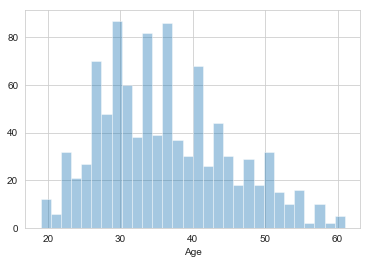

In [5]:
# Create a histogram of the Age
sns.distplot(ad_data['Age'].dropna(), kde=False, bins=30)
plt.show()

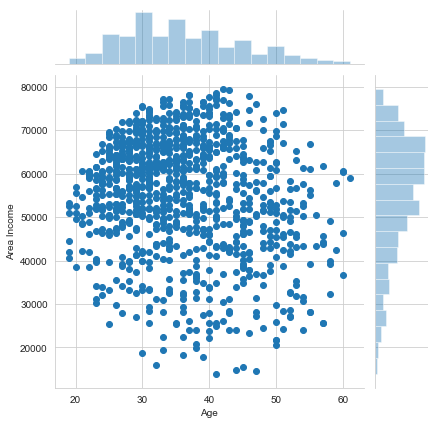

In [6]:
# Create a jointlot of the Age and Area Income columns
sns.jointplot(x='Age', y='Area Income', data = ad_data, kind ='scatter')
plt.show()

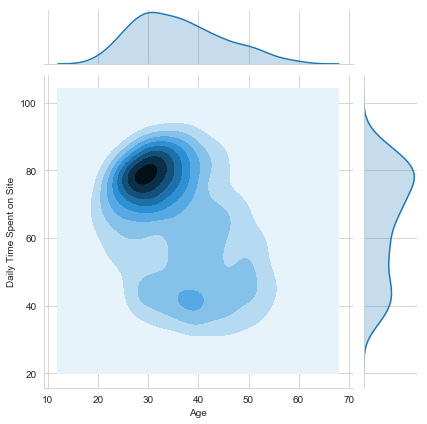

In [7]:
# Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.
sns.jointplot(x='Age', y='Daily Time Spent on Site', data = ad_data, kind='kde')
plt.show()

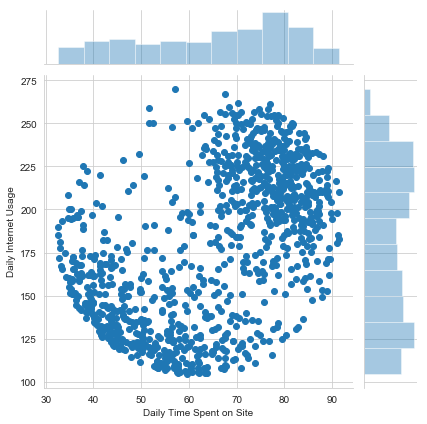

In [8]:
# Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'
sns.jointplot('Daily Time Spent on Site', 'Daily Internet Usage', data=ad_data, kind='scatter')
plt.show()

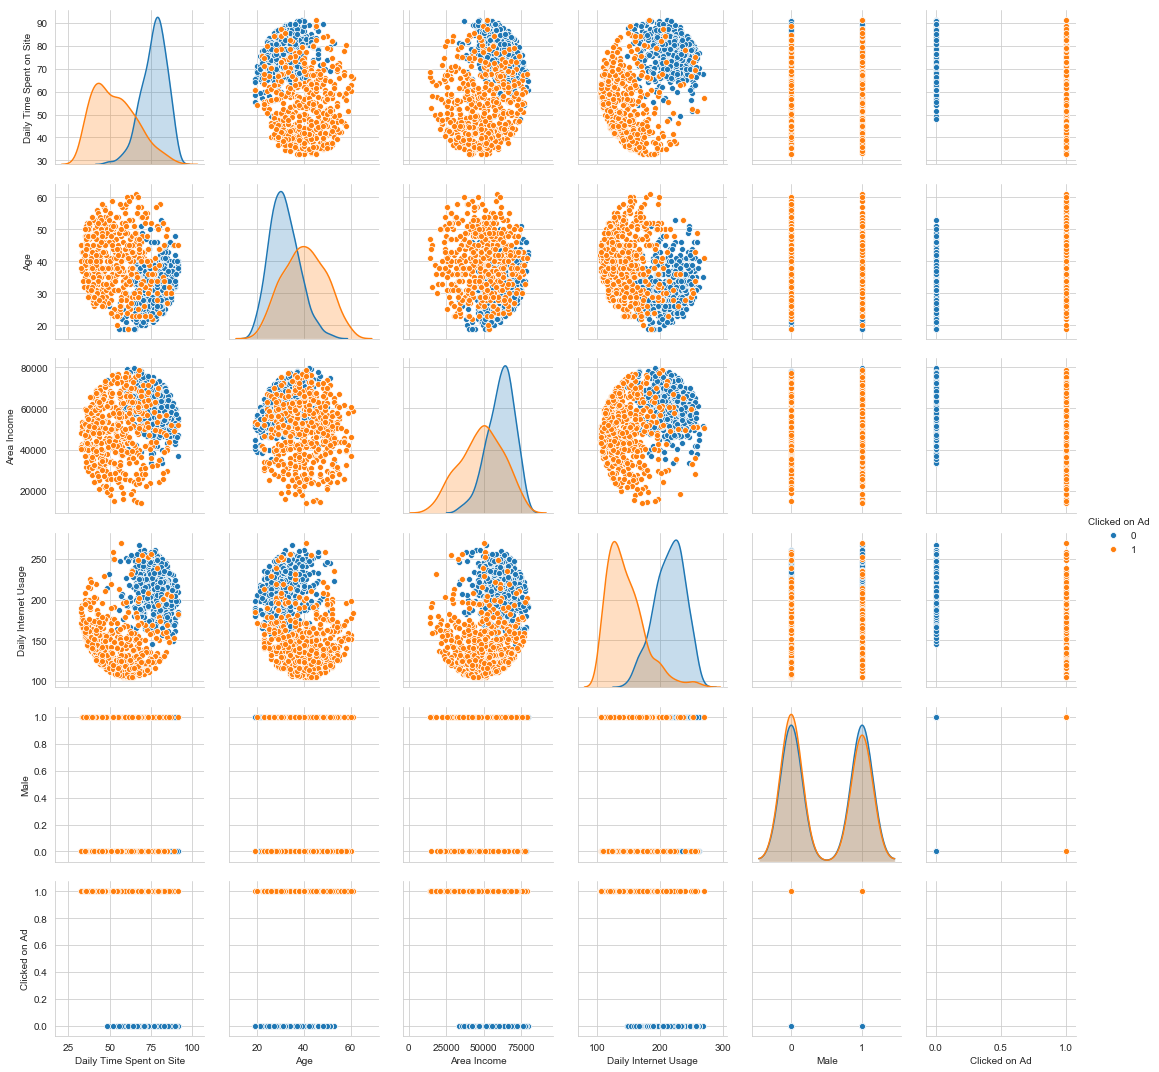

In [9]:
# Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.
sns.pairplot(ad_data, hue='Clicked on Ad')
plt.show()

In [10]:
# Show column names
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

## Preparing our data for the models and splitting data into train and cv(or test)

In [11]:
#Splitting Data into train and Test sklearn https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train_main, X_test, y_train_main, y_test = train_test_split(ad_data[['Daily Time Spent on Site', 'Age', 
                                                                       'Area Income', 'Daily Internet Usage','Male']],
                                                    ad_data['Clicked on Ad'],
                                                    stratify= ad_data['Clicked on Ad'],
                                                    test_size = 0.20)

## Feature Scaling

In [12]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
X_train_main = r_scaler.fit_transform(X_train_main)
X_test = r_scaler.transform(X_test)

# 1. K-NN

##### Model Tuning


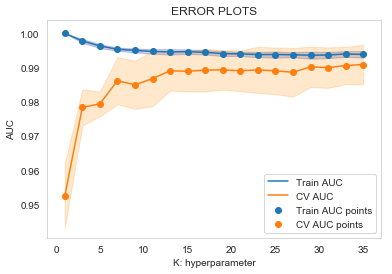

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV
neigh = KNeighborsClassifier()
parameters ={'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]}
model1=GridSearchCV(neigh, parameters, cv=5, scoring='roc_auc',return_train_score=True)
model1.fit(X_train_main, y_train_main);

train_auc= model1.cv_results_['mean_train_score']
train_auc_std= model1.cv_results_['std_train_score']
cv_auc = model1.cv_results_['mean_test_score'] 
cv_auc_std= model1.cv_results_['std_test_score']

plt.plot(parameters['n_neighbors'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [14]:
K = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35]
scor = [x for x in cv_auc]
best_K = K[scor.index(max(scor))]
print("Maximum AUC score of cv is:" + ' ' + str(max(scor)))
print("Corresponding k value of cv is:",best_K, '\n')

print("Best k for the model is: ", best_K)

Maximum AUC score of cv is: 0.9908593749999999
Corresponding k value of cv is: 35 

Best k for the model is:  35


##### Measuring AUC Score for Test Data

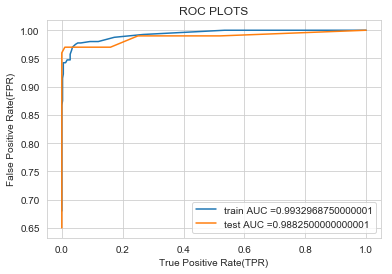

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

model1 = KNeighborsClassifier(n_neighbors=best_K,algorithm='brute')
model1.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model1.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

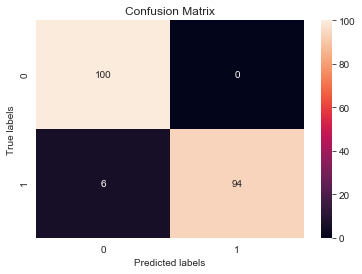

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()

def predict(proba,threshold,fpr,tpr):
    t=threshold[np.argmax(fpr*(1-tpr))]
    print("the maximun value of tpr*(1-fpr)",np.round(max(tpr*(1-fpr)),2) ,"for threshold",np.round(t,2))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


sns.heatmap(confusion_matrix(y_test, model1.predict(X_test)), annot=True, ax = ax,fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model1.predict(X_test)))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97       100
          1       1.00      0.94      0.97       100

avg / total       0.97      0.97      0.97       200



# 2. Logistic Regression


##### Model Tuning

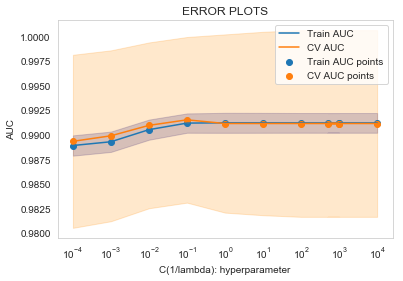

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced');
parameters ={'C':[10**-4, 10**-3,10**-2, 10**-1, 1, 10, 100, 1000, 500, 1000, 10000]}
model2=GridSearchCV(lr, parameters, cv=10, scoring='roc_auc',return_train_score=True)
model2.fit(X_train_main, y_train_main)

train_auc= model2.cv_results_['mean_train_score']
train_auc_std= model2.cv_results_['std_train_score']
cv_auc = model2.cv_results_['mean_test_score'] 
cv_auc_std= model2.cv_results_['std_test_score']

plt.plot(parameters['C'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['C'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['C'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['C'], train_auc, label='Train AUC points')
plt.scatter(parameters['C'], cv_auc, label='CV AUC points')
plt.xscale('log') 

plt.legend()
plt.xlabel("C(1/lambda): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [19]:
C = [10**-4, 10**-3,10**-2, 10**-1, 1, 10, 100, 1000, 500, 1000, 10000]
scor = [x for x in cv_auc]
best_C = C[scor.index(max(scor))]
print("Maximum AUC score of cv is:" + ' ' + str(max(scor)))
print("Corresponding C value of cv is:",best_C, '\n')

print("Best C for the Model is: ", best_C)

Maximum AUC score of cv is: 0.9914999999999999
Corresponding C value of cv is: 0.1 

Best C for the Model is:  0.1


##### Measuring AUC Score for Test Data


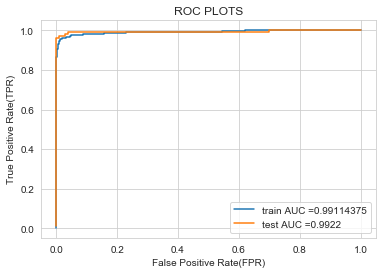

In [20]:
from sklearn.metrics import roc_curve, auc

model2 = LogisticRegression(C=best_C,class_weight='balanced');
model2.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model2.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model2.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Classification Report

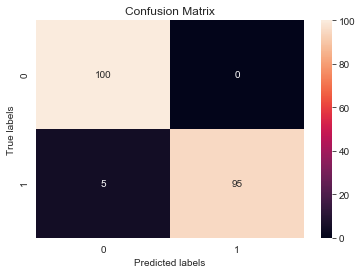

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model2.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model2.predict(X_test)))

             precision    recall  f1-score   support

          0       0.95      1.00      0.98       100
          1       1.00      0.95      0.97       100

avg / total       0.98      0.97      0.97       200



# 3. Decision Tree


##### Model Tuning

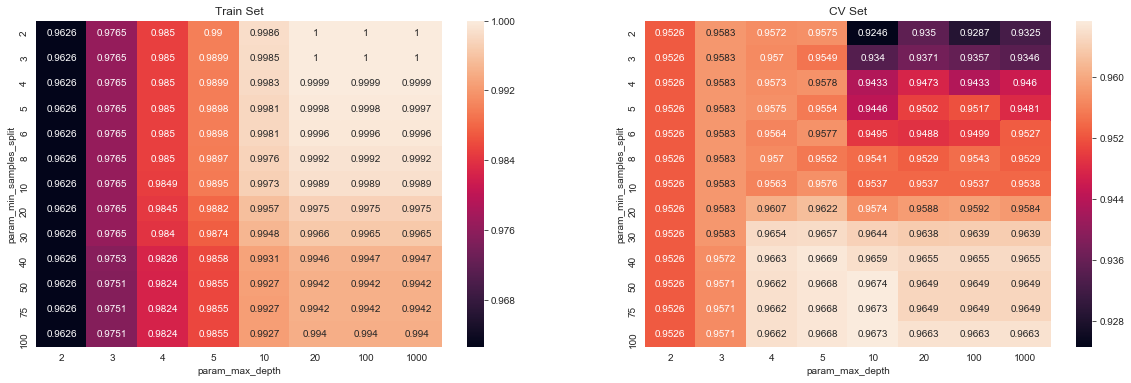

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight = 'balanced')

parameters = {'max_depth': [2,3,4,5,10,20,100, 1000], 'min_samples_split': [2,3,4,5,6,8, 10,20,30,40,50,75, 100]}
model3 = GridSearchCV(dt, parameters, cv=10, scoring='roc_auc',return_train_score=True)
model3.fit(X_train_main, y_train_main)

max_scores1 = pd.DataFrame(model3.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [24]:
print(model3.best_params_)

{'max_depth': 10, 'min_samples_split': 50}


##### Measuring AUC Score for Test Data


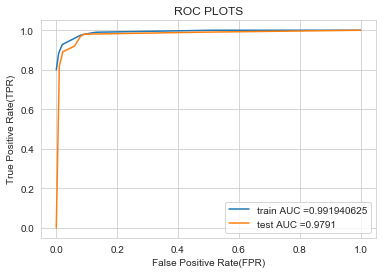

In [25]:
model3 = DecisionTreeClassifier(**model3.best_params_)
model3.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model3.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model3.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

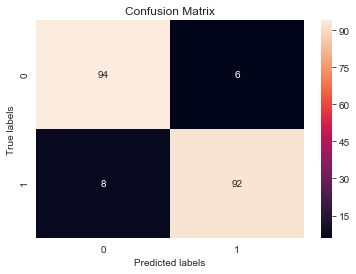

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model3.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model3.predict(X_test)))

             precision    recall  f1-score   support

          0       0.92      0.94      0.93       100
          1       0.94      0.92      0.93       100

avg / total       0.93      0.93      0.93       200



# 4. SVM

### L2 Regularization

##### Model Tuning

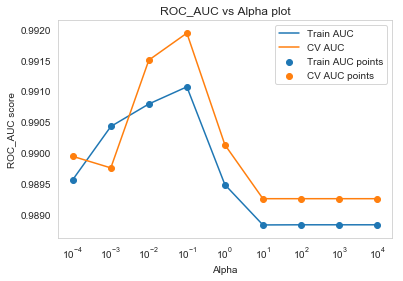

In [28]:
from sklearn.linear_model import SGDClassifier

parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sgdc = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
model4 = GridSearchCV(sgdc, parameters, cv= 10, scoring='roc_auc',return_train_score=True)
model4.fit(X_train_main, y_train_main)

train_auc = model4.cv_results_['mean_train_score']
cv_auc= model4.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.xscale('log')
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()

In [29]:
alpha = [10**-4, 10**-3,10**-2, 10**-1, 1, 10, 100, 1000, 500, 1000, 10000]
scor = [x for x in cv_auc]
best_alpha = alpha[scor.index(max(scor))]
print("Maximum AUC score of cv is:" + ' ' + str(max(scor)))
print("Corresponding alpha value of cv is:",best_alpha, '\n')

print("Best alpha for the model is: ", best_alpha)

Maximum AUC score of cv is: 0.9919374999999999
Corresponding alpha value of cv is: 0.1 

Best alpha for the model is:  0.1


##### Measuring AUC Score for Test Data

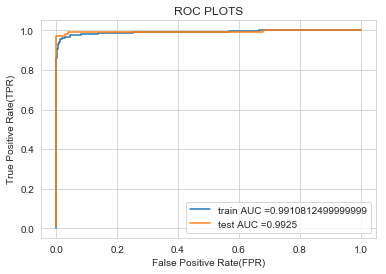

In [30]:
model4 = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced', alpha = best_alpha)
model4.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model4.decision_function(X_train_main)
y_test_pred = model4.decision_function(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_main, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

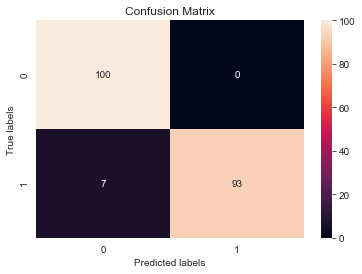

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model4.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model4.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      1.00      0.97       100
          1       1.00      0.93      0.96       100

avg / total       0.97      0.96      0.96       200



### L1 Regularization

##### Model Tuning


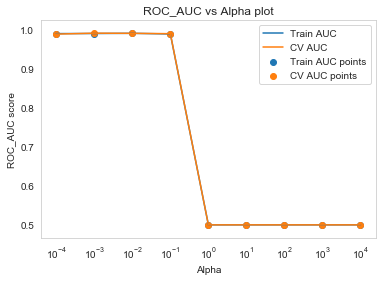

In [33]:
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sgdc = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')
model5 = GridSearchCV(sgdc, parameters, cv= 10, scoring='roc_auc',return_train_score=True)
model5.fit(X_train_main, y_train_main)
train_auc = model5.cv_results_['mean_train_score']
cv_auc= model5.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.xscale('log')
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()

In [34]:
alpha = [10**-4, 10**-3,10**-2, 10**-1, 1, 10, 100, 1000, 500, 1000, 10000]
scor = [x for x in cv_auc]
best_alpha = alpha[scor.index(max(scor))]
print("Maximum AUC score of cv is:" + ' ' + str(max(scor)))
print("Corresponding alpha value of cv is:",best_alpha, '\n')

print("Best alpha for the model is: ", best_alpha)

Maximum AUC score of cv is: 0.9914375
Corresponding alpha value of cv is: 0.001 

Best alpha for the model is:  0.001


##### Measuring AUC Score for Test Data


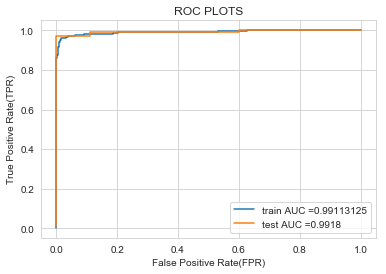

In [35]:
model5 = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced', alpha = best_alpha)
model5.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = model5.decision_function(X_train_main)
y_test_pred = model5.decision_function(X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_main, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

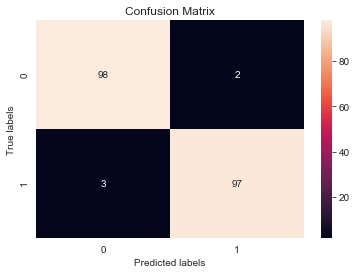

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model5.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model5.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98       100
          1       0.98      0.97      0.97       100

avg / total       0.98      0.97      0.97       200



# 5. Random Forest

##### Model Tuning


In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
parameters = {'n_estimators': [300], 'max_depth': [2, 5, 10, 20, None], "max_features": [2,5],
              'min_samples_split': [2, 5, 10]}
model6 = GridSearchCV(rf, parameters, cv=4, scoring='roc_auc',return_train_score=True)
model6.fit(X_train_main, y_train_main)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [300], 'max_depth': [2, 5, 10, 20, None], 'max_features': [2, 5], 'min_samples_split': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [39]:
print(model6.best_params_)

{'max_depth': 10, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 300}


##### Measuring AUC Score for Test Data

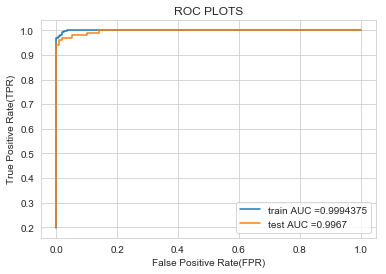

In [40]:
model6 = RandomForestClassifier(**model6.best_params_)
model6.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model6.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model6.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

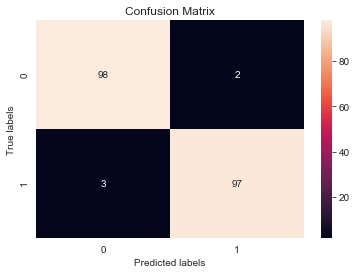

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model6.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

##### Classification Report

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model6.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98       100
          1       0.98      0.97      0.97       100

avg / total       0.98      0.97      0.97       200



# 6. Gradient Boosting


##### Model Tuning

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
parameters = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [2,5,10],
             "n_estimators": [500],
             "subsample": [1,0.5,0.8]}

model7 = GridSearchCV(gb_model, parameters, cv=4, scoring='roc_auc',return_train_score=True)
model7.fit(X_train_main, y_train_main)

GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.001, 0.1, 0.01], 'max_depth': [2, 5, 10], 'n_estimators': [500], 'subsample': [1, 0.5, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [44]:
print(model7.best_params_)

{'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.5}


##### Measuring AUC Score for Test Data


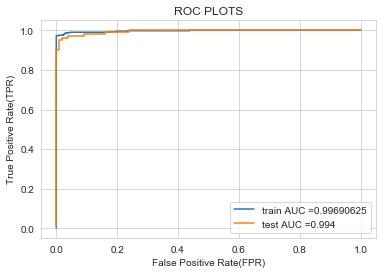

In [45]:
model7 = GradientBoostingClassifier(**model7.best_params_)
model7.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model7.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model7.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

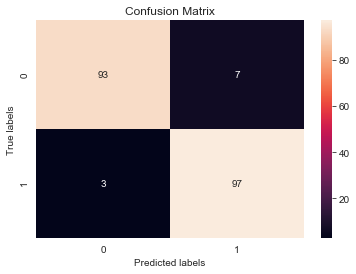

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model7.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

##### Classification Report

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model7.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.93      0.95       100
          1       0.93      0.97      0.95       100

avg / total       0.95      0.95      0.95       200



# 7. Light GBM

##### Model Tuning


In [48]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier()
parameters = {"learning_rate": [0.01, 0.05, 0.1],
              "n_estimators": [800],
              "max_depth":[5,8,10],
              "colsample_bytree": [1,0.5,0.3]}

model8 = GridSearchCV(lgbm_model, parameters, cv=5, scoring='roc_auc',return_train_score=True)
model8.fit(X_train_main, y_train_main)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [800], 'max_depth': [5, 8, 10], 'colsample_bytree': [1, 0.5, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [49]:
print(model8.best_params_)

{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 800}


##### Measuring AUC Score for Test Data

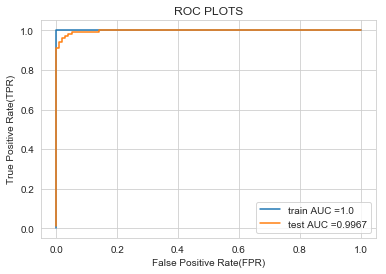

In [50]:
model8 = LGBMClassifier(**model8.best_params_)
model8.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model8.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model8.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


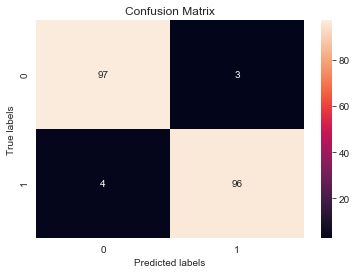

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model8.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model8.predict(X_test)))

             precision    recall  f1-score   support

          0       0.96      0.97      0.97       100
          1       0.97      0.96      0.96       100

avg / total       0.97      0.96      0.96       200



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# 8. XGBoost

##### Model Tuning

In [53]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
parameters = {"learning_rate": [0.1,0.01,1],
             "max_depth": [2,5,8],
             "n_estimators": [800],
             "colsample_bytree": [0.3,0.6,1]}

model9 = GridSearchCV(xgb_model, parameters, cv=5, scoring='roc_auc',return_train_score=True)
model9.fit(X_train_main, y_train_main)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.01, 1], 'max_depth': [2, 5, 8], 'n_estimators': [800], 'colsample_bytree': [0.3, 0.6, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [54]:
print(model9.best_params_)

{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 800}


##### Measuring AUC Score for Test Data


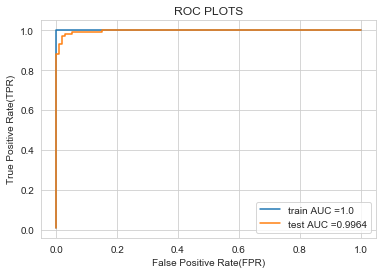

In [55]:
model9 = XGBClassifier(**model9.best_params_)
model9.fit(X_train_main ,y_train_main)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train_main, model9.predict_proba(X_train_main)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model9.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.ylabel("True Positive Rate(TPR)")
plt.xlabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.show()

##### Confusion Matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


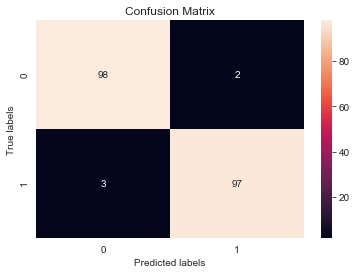

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, model9.predict(X_test )), annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

##### Classification Report

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model9.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98       100
          1       0.98      0.97      0.97       100

avg / total       0.98      0.97      0.97       200



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Conclusion

In [58]:
# Compare all models using Prettytable library
# how to use pretty table http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= ("Model", "AUC Score", "Recall Score", "F1 Score")
tb.add_row(["KNN", "0.988", "0.94", "0.97"])
tb.add_row(["Logistic Regression", "0.992", "0.95", "0.97"])
tb.add_row(["Decision Tree", "0.979","0.92", "0.93"])
tb.add_row(["SVM - L2 Regularization", "0.992", "0.93", "0.96"])
tb.add_row(["SVM - L1 Regularization", "0.991", "0.97", "0.97"])
tb.add_row(["Random Forest", "0.996", "0.97", "0.97"])
tb.add_row(["Gradient Boosting", "0.994", "0.97", "0.95"])
tb.add_row(["Light GBM", "0.996", "0.96", "0.96"])
tb.add_row(["XGBoost", "0.996", "0.97", "0.97"])

print(tb)

+-------------------------+-----------+--------------+----------+
|          Model          | AUC Score | Recall Score | F1 Score |
+-------------------------+-----------+--------------+----------+
|           KNN           |   0.988   |     0.94     |   0.97   |
|   Logistic Regression   |   0.992   |     0.95     |   0.97   |
|      Decision Tree      |   0.979   |     0.92     |   0.93   |
| SVM - L2 Regularization |   0.992   |     0.93     |   0.96   |
| SVM - L1 Regularization |   0.991   |     0.97     |   0.97   |
|      Random Forest      |   0.996   |     0.97     |   0.97   |
|    Gradient Boosting    |   0.994   |     0.97     |   0.95   |
|        Light GBM        |   0.996   |     0.96     |   0.96   |
|         XGBoost         |   0.996   |     0.97     |   0.97   |
+-------------------------+-----------+--------------+----------+
